In [1]:
import numpy as np
import pandas as pd
import wandb
import my28brains.viz as viz
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.hyperbolic import Hyperbolic

INFO: Using numpy backend


In [208]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("bioshape-lab/my28brains-my28brains")

start_date = pd.to_datetime("2023-10-20")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    if pd.to_datetime(run.createdAt) > start_date:
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)
    
        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
              if not k.startswith('_')})
    
        # .name is the human-readable name of the run.
        name_list.append(run.name)

summary_df = pd.DataFrame.from_dict(
    summary_list)
config_df = pd.DataFrame.from_dict(
    config_list)
name_df = pd.DataFrame.from_dict(
    name_list)

runs_df = pd.concat([summary_df, config_df, name_df], axis = 1)

runs_df.to_csv("my28brains/notebooks/csv/project.csv")

In [210]:
runs_df.head()

y_pred_for_lr  linear_intercept_err  \
0  {'path': 'media/object3D/y_pred_for_lr_1_6c576...            309.887083   
1  {'path': 'media/object3D/y_pred_for_lr_1_49fae...              5.066097   
2                                                NaN              1.843285   
3                                                NaN              1.713908   
4                                                NaN              1.924785   

                              mesh_sequence_vertices  n_faces  nrmsd_linear  \
0  {'path': 'media/object3D/mesh_sequence_vertice...    320.0  7.991225e-08   
1  {'path': 'media/object3D/mesh_sequence_vertice...     80.0  9.233764e-06   
2                                                NaN      NaN  1.353440e-01   
3                                                NaN      NaN  1.431113e-01   
4                                                NaN      NaN  3.038591e-01   

   linear_coef_err  rmsd_linear  \
0       600.434099     0.001036   
1        10.332589     0.002042   
2         7.544288     2.765382   
3         6.108335     2.444693   
4         7.919884     3.520194   

                                      true_intercept  \
0  {'path': 'media/object3D/true_intercept_1_3913...   
1  {'path': 'media/object3D/true_intercept_1_3632...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                linear_intercept_hat  \
0  {'_type': 'object3D-file', 'sha256': 'f6134f65...   
1  {'path': 'media/object3D/linear_intercept_hat_...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                       offset_mesh_sequence_vertices  ...  noise_factor  \
0  {'sha256': '437a77e62979d310ef641bae9953f9d87a...  ...          0.01   
1  {'path': 'media/object3D/offset_mesh_sequence_...  ...          0.01   
2                                                NaN  ...          0.01   
3                                                NaN  ...          0.01   
4                                                NaN  ...          0.01   

   ellipsoid_dims  n_subdivisions  linear_residuals ellipse_ratio_h_v  \
0       [2, 2, 3]             2.0              True          0.666667   
1       [2, 2, 3]             1.0              True          0.666667   
2             NaN             NaN              True               NaN   
3             NaN             NaN              True               NaN   
4             NaN             NaN              True               NaN   

   geodesic_initialization  full_run linear_noise space_dimension  \
0               warm_start       NaN          NaN             NaN   
1               warm_start      True          NaN             NaN   
2                   random     False         True             3.0   
3                   random     False         True             2.0   
4                   random      True        False             3.0   

              0  
0  run_d2v6cikz  
1  run_e95j2cfr  
2  run_m8ctbmyn  
3  run_ncor27s3  
4  run_y8vk9i8g  

[5 rows x 54 columns]

In [2]:
import os

os.getcwd()

'/Users/adelemyers/code/my28brains'

In [3]:
df = pd.read_csv("my28brains/notebooks/csv/project.csv")
df = df.dropna(axis=1, how='all')
df.head()

Unnamed: 0                                      y_pred_for_lr  \
0           0  {'path': 'media/object3D/y_pred_for_lr_1_6c576...   
1           1  {'path': 'media/object3D/y_pred_for_lr_1_49fae...   
2           2                                                NaN   
3           3                                                NaN   
4           4                                                NaN   

   linear_intercept_err                             mesh_sequence_vertices  \
0            309.887083  {'path': 'media/object3D/mesh_sequence_vertice...   
1              5.066097  {'path': 'media/object3D/mesh_sequence_vertice...   
2              1.843285                                                NaN   
3              1.713908                                                NaN   
4              1.924785                                                NaN   

   n_faces  nrmsd_linear  linear_coef_err  rmsd_linear  \
0    320.0  7.991225e-08       600.434099     0.001036   
1     80.0  9.233764e-06        10.332589     0.002042   
2      NaN  1.353440e-01         7.544288     2.765382   
3      NaN  1.431113e-01         6.108335     2.444693   
4      NaN  3.038591e-01         7.919884     3.520194   

                                      true_intercept  \
0  {'path': 'media/object3D/true_intercept_1_3913...   
1  {'path': 'media/object3D/true_intercept_1_3632...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                linear_intercept_hat  ... noise_factor.1  \
0  {'_type': 'object3D-file', 'sha256': 'f6134f65...  ...           0.01   
1  {'path': 'media/object3D/linear_intercept_hat_...  ...           0.01   
2                                                NaN  ...           0.01   
3                                                NaN  ...           0.01   
4                                                NaN  ...           0.01   

   ellipsoid_dims  n_subdivisions  linear_residuals  ellipse_ratio_h_v  \
0       [2, 2, 3]             2.0              True           0.666667   
1       [2, 2, 3]             1.0              True           0.666667   
2             NaN             NaN              True                NaN   
3             NaN             NaN              True                NaN   
4             NaN             NaN              True                NaN   

  geodesic_initialization.1  full_run  linear_noise.1 space_dimension  \
0                warm_start       NaN             NaN             NaN   
1                warm_start      True             NaN             NaN   
2                    random     False            True             3.0   
3                    random     False            True             2.0   
4                    random      True           False             3.0   

              0  
0  run_d2v6cikz  
1  run_e95j2cfr  
2  run_m8ctbmyn  
3  run_ncor27s3  
4  run_y8vk9i8g  

[5 rows x 55 columns]

In [4]:
df_hyperboloid = df[df["dataset_name"] == "hyperboloid"]
df_hyperboloid = df_hyperboloid.dropna(axis=1, how='all')
df_hyperboloid.head()

Unnamed: 0  linear_intercept_err  nrmsd_linear  linear_coef_err  \
2           2              1.843285      0.135344         7.544288   
3           3              1.713908      0.143111         6.108335   
4           4              1.924785      0.303859         7.919884   
5           5              1.661009      0.153542         5.950067   
6           6              1.839982      0.134782         7.537182   

   rmsd_linear    _runtime    _timestamp  geodesic_tol  linear_duration_time  \
2     2.765382    9.354158  1.698040e+09         0.001              0.031105   
3     2.444693    8.749468  1.698040e+09         0.001              0.072371   
4     3.520194  103.848330  1.698040e+09         0.001              0.116163   
5     2.316536   49.814891  1.698040e+09         0.001              0.130234   
6     2.752211    9.166451  1.698040e+09         0.001              0.040865   

   _step  ... n_steps  tol_factor  dataset_name  noise_factor.1  \
2    2.0  ...     5.0         0.5   hyperboloid           0.010   
3    2.0  ...     5.0         0.5   hyperboloid           0.010   
4    3.0  ...     5.0         0.5   hyperboloid           0.010   
5    4.0  ...     5.0         0.5   hyperboloid           0.010   
6    2.0  ...     5.0         0.5   hyperboloid           0.001   

   linear_residuals  geodesic_initialization.1 full_run  linear_noise.1  \
2              True                     random    False            True   
3              True                     random    False            True   
4              True                     random     True           False   
5              True                     random     True           False   
6              True                     random    False            True   

  space_dimension             0  
2             3.0  run_m8ctbmyn  
3             2.0  run_ncor27s3  
4             3.0  run_y8vk9i8g  
5             2.0  run_qvx5y905  
6             3.0  run_3xjfadr5  

[5 rows x 36 columns]

In [5]:
df_hypersphere = df[df["dataset_name"] == "hypersphere"]
df_hypersphere = df_hypersphere.dropna(axis=1, how='all')
df_hypersphere.head()

Unnamed: 0  linear_intercept_err  nrmsd_linear  linear_coef_err  \
2564        2564              0.261831      0.145180         0.627412   
2565        2565              0.424177      0.214505         1.336643   
2566        2566              0.263799      0.141802         0.618710   
2567        2567              0.424806      0.212253         1.328308   
2568        2568              0.263781      0.141832         0.619406   

      rmsd_linear   _runtime    _timestamp  geodesic_tol  \
2564     0.270074  16.364206  1.697895e+09         0.001   
2565     0.426084  16.533973  1.697895e+09         0.001   
2566     0.267214  19.745065  1.697895e+09         0.001   
2567     0.424065  16.410535  1.697895e+09         0.001   
2568     0.267323  18.664249  1.697895e+09         0.001   

      linear_duration_time  _step  ... n_steps  tol_factor  dataset_name  \
2564              0.015992    3.0  ...     5.0         0.5   hypersphere   
2565              0.017123    4.0  ...     5.0         0.5   hypersphere   
2566              0.099366    3.0  ...     5.0         0.5   hypersphere   
2567              0.134814    4.0  ...     5.0         0.5   hypersphere   
2568              0.034981    3.0  ...     5.0         0.5   hypersphere   

      noise_factor.1  linear_residuals  geodesic_initialization.1 full_run  \
2564           0.010              True                     random     True   
2565           0.010              True                     random     True   
2566           0.010              True                     random     True   
2567           0.010              True                     random     True   
2568           0.001              True                     random     True   

      linear_noise.1 space_dimension             0  
2564            True             3.0  run_4ntn5exa  
2565            True             2.0  run_f917vzsh  
2566           False             3.0  run_uobvc7ym  
2567           False             2.0  run_5q9iuuzu  
2568            True             3.0  run_4txn6oxs  

[5 rows x 36 columns]

In [6]:
df_hyperboloid.columns

Index(['Unnamed: 0', 'linear_intercept_err', 'nrmsd_linear', 'linear_coef_err',
       'rmsd_linear', '_runtime', '_timestamp', 'geodesic_tol',
       'linear_duration_time', '_step', 'geodesic_initialization',
       'nrmsd_geod', 'geodesic_intercept_err', 'geodesic_coef_err',
       'n_geod_iterations', 'rmsd_geod', '_wandb', 'geodesic_duration_time',
       'linear_noise', 'noise_factor', 'gr_geod_residuals',
       'n_geod_function_evaluations', 'gr_linear_residuals',
       'n_geod_jacobian_evaluations', 'line vs geodesic', 'n_X', 'n_steps',
       'tol_factor', 'dataset_name', 'noise_factor.1', 'linear_residuals',
       'geodesic_initialization.1', 'full_run', 'linear_noise.1',
       'space_dimension', '0'],
      dtype='object')

In [7]:
df_hyperboloid.columns

Index(['Unnamed: 0', 'linear_intercept_err', 'nrmsd_linear', 'linear_coef_err',
       'rmsd_linear', '_runtime', '_timestamp', 'geodesic_tol',
       'linear_duration_time', '_step', 'geodesic_initialization',
       'nrmsd_geod', 'geodesic_intercept_err', 'geodesic_coef_err',
       'n_geod_iterations', 'rmsd_geod', '_wandb', 'geodesic_duration_time',
       'linear_noise', 'noise_factor', 'gr_geod_residuals',
       'n_geod_function_evaluations', 'gr_linear_residuals',
       'n_geod_jacobian_evaluations', 'line vs geodesic', 'n_X', 'n_steps',
       'tol_factor', 'dataset_name', 'noise_factor.1', 'linear_residuals',
       'geodesic_initialization.1', 'full_run', 'linear_noise.1',
       'space_dimension', '0'],
      dtype='object')

In [8]:
df_hypersphere.columns

Index(['Unnamed: 0', 'linear_intercept_err', 'nrmsd_linear', 'linear_coef_err',
       'rmsd_linear', '_runtime', '_timestamp', 'geodesic_tol',
       'linear_duration_time', '_step', 'geodesic_initialization',
       'nrmsd_geod', 'geodesic_intercept_err', 'geodesic_coef_err',
       'n_geod_iterations', 'rmsd_geod', '_wandb', 'geodesic_duration_time',
       'linear_noise', 'noise_factor', 'gr_geod_residuals',
       'n_geod_function_evaluations', 'gr_linear_residuals',
       'n_geod_jacobian_evaluations', 'line vs geodesic', 'n_X', 'n_steps',
       'tol_factor', 'dataset_name', 'noise_factor.1', 'linear_residuals',
       'geodesic_initialization.1', 'full_run', 'linear_noise.1',
       'space_dimension', '0'],
      dtype='object')

# Convert linear residuals truth values into ints (for color map)

In [9]:
df_hypersphere["linear_residuals_colors"] = df_hypersphere["linear_residuals"]*1
# print(df_hypersphere[df_hypersphere["linear_residuals_colors"]==1])

df_hypersphere["linear_noise_colors"] = df_hypersphere["linear_noise"]*1

In [10]:
df_hyperboloid["linear_residuals_colors"] = df_hyperboloid["linear_residuals"]*1

df_hyperboloid["linear_noise_colors"] = df_hyperboloid["linear_noise"]*1

In [11]:
COL_TO_TEXT = {
    "linear_residuals_colors": "Linear Residuals: 1 = True",
    "linear_noise_colors": "Linear Noise: 1 = True",
    "geodesic_coef_err" : "Geodesic Coef Error",
    "geodesic_duration_time" : "Geodesic Duration Time",
    "noise_factor": "Noise Factor",
    "rmsd_geod": "RMSD, Geodesic Regression",
    "nrmsd_geod": "Normalized RMSD, Geodesic Regression",
    "n_X": "Number of Points",
    "n_geod_iterations": "Number of iterations in GR",
}

# First, look at Hypersphere

In [28]:
import plotly.express as px
import plotly.io as pio

fontsize = 15


def diff_scatter_grouped(
    df,
    colored_by="linear_residuals_colors",
    marked_by="geodesic_coef_err",
    y_label="geodesic_coef_err",
    x_label = "geodesic_duration_time",
):
    x = df[x_label]
    y = df[y_label]
    value_to_symbol = dict(
        zip(df[marked_by].unique(), ["diamond", "x", "cross", "square", "star"])
    )

    if colored_by == "n_steps":
        color_discrete_sequence = px.colors.sequential.Plasma_r
    else:
        color_discrete_sequence = px.colors.sequential.Viridis_r

    fig = px.scatter(
        df,
        x=x,
        y=y,
        color=[str(c) for c in df[colored_by].values],
        color_discrete_sequence=color_discrete_sequence,  # px.colors.qualitative.Dark24,  # D3 #Dark24 # Pastel
        # color_discrete_sequence=px.colors.sequential.Viridis_r, #px.colors.qualitative.Dark24,  # D3 #Dark24 # Pastel
        symbol=[s for s in df[marked_by].values],
        symbol_map=value_to_symbol,
    )

    fig.update_layout(
        xaxis_title=dict(
            text=COL_TO_TEXT[x_label],
            font=dict(family="CMU", size=fontsize),
        ),
        yaxis_title=dict(
            text=COL_TO_TEXT[y_label], font=dict(family="CMU", size=fontsize)
        ),
        title_font=dict(family="CMU", size=fontsize),
        xaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        yaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        legend=dict(
            font=dict(family="CMU", size=fontsize), title=COL_TO_TEXT[colored_by]
        ),
        width=650,
        height=370,
    )

    fig.update_traces(marker=dict(size=9, opacity=0.9))
    pio.write_image(fig, f"regression_benchmark_{colored_by}.svg")
    fig.show()

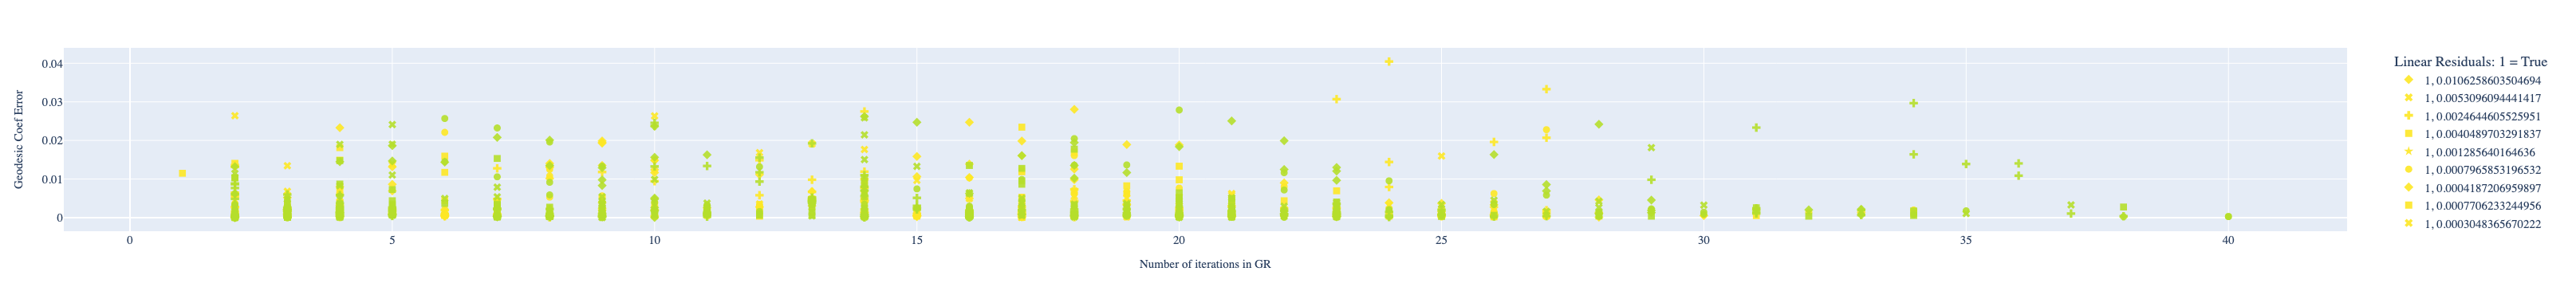

In [29]:
diff_scatter_grouped(
    df = df_hypersphere,
    colored_by="linear_residuals_colors",
    marked_by="geodesic_coef_err",
    y_label="geodesic_coef_err",
    x_label = "n_geod_iterations",
)

# Hyperboloid plot

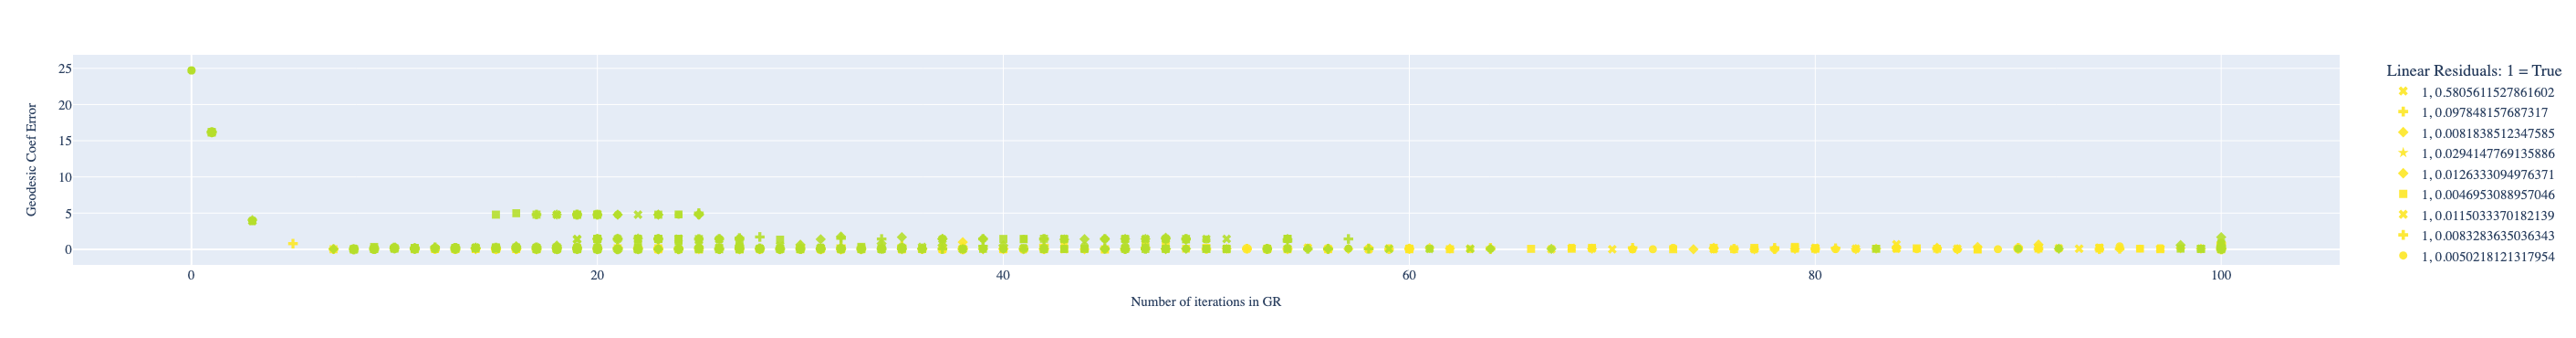

In [14]:
diff_scatter_grouped(
    df = df_hyperboloid,
    colored_by="linear_residuals_colors",
    marked_by="geodesic_coef_err",
    y_label="geodesic_coef_err",
    x_label = "n_geod_iterations",
)

# Meeting with Nina: plots from white board

1. Visualization of one training --> Go to notebook 10

In [15]:
dim = 2
n_X = 30
space = Hyperbolic(dim=dim, default_coords_type="extrinsic")

In [16]:
true_sequence = space.metric.geodesic()

TypeError: Connection.geodesic() missing 1 required positional argument: 'initial_point'

In [ ]:
viz.benchmark_data_sequence(space=space, sequence_1=true_sequence, sequence_2 = , sequence_3 = )

2. RMSD linear as a function of noise level

In [17]:
# Parameters to fix
dataset_name = "hypersphere"
n_X = 30
dim = 3

In [18]:
df_space = df[df["dataset_name"] == dataset_name]
df_space = df_space.dropna(axis=1, how='all')
df_space["linear_residuals_colors"] = df_space["linear_residuals"]*1
df_space["linear_noise_colors"] = df_space["linear_noise"]*1

df2 = df_space[df_space["space_dimension"] == dim]

In [19]:
#df_hyperboloid_gr = df_hyperboloid[df_hyperboloid["linear_residuals"] == False]

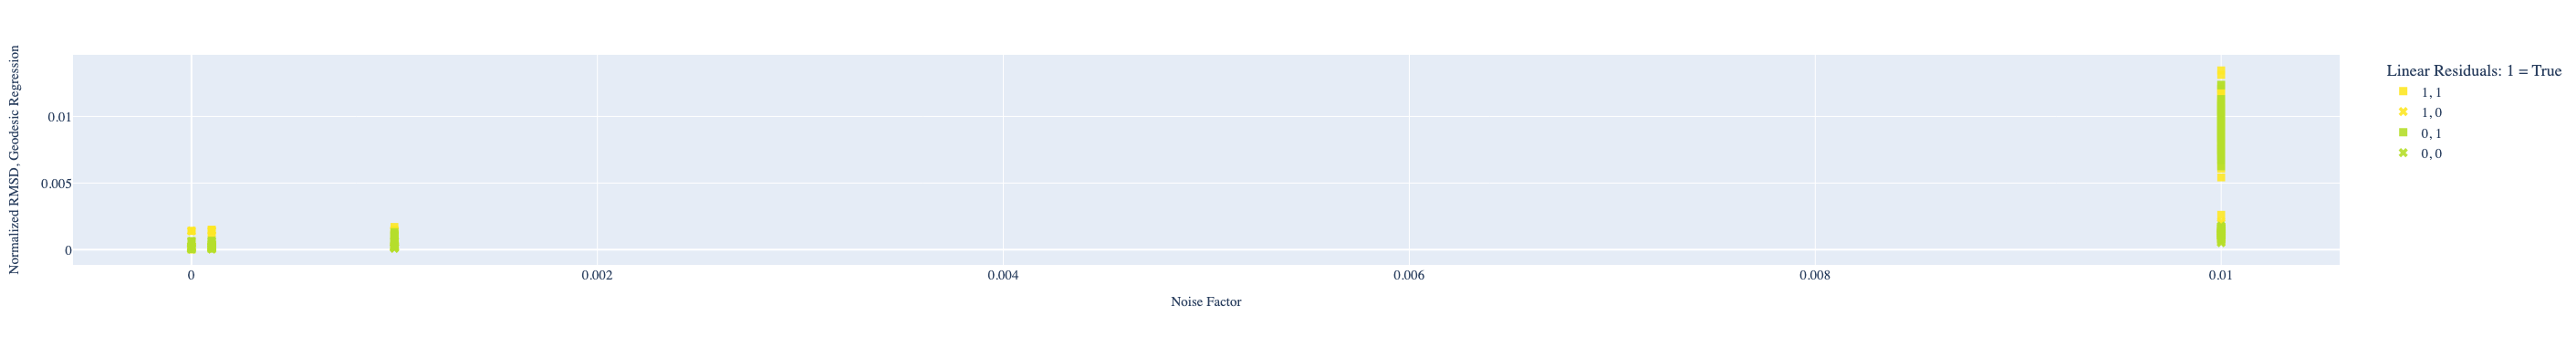

In [20]:
diff_scatter_grouped(
    df = df2,
    colored_by="linear_residuals_colors",
    marked_by="linear_noise_colors",
    y_label="nrmsd_geod",
    x_label = "noise_factor",
)

3. RMSD geodesic as a function of noise level (same plot as above, but we want to record the geodesic formulation of the RMSD)

In [21]:
diff_scatter_grouped(
    df = df_hyperboloid_gr,
    colored_by="linear_residuals_colors",
    marked_by="linear_noise_colors",
    y_label="nrmsd_geod",
    x_label = "noise_factor",
)

NameError: name 'df_hyperboloid_gr' is not defined

4. Number of iterations as a function of the sample size n_X

4a.hyperboloid

In [22]:
# Parameters to fix
dataset_name = "hypersphere"

dim = 3
noise_factor = 0.01
noise_type = "geodesic"

In [23]:
df_space = df[df["dataset_name"] == dataset_name]
df_space = df_space.dropna(axis=1, how='all')
df_space["linear_residuals_colors"] = df_space["linear_residuals"]*1
df_space["linear_noise_colors"] = df_space["linear_noise"]*1

df4 = df_space[df_space["space_dimension"] == dim]
df4 = df4[df4["noise_factor"] == noise_factor]
df4 = df4[df4["linear_noise"] == (noise_type == "linear")]

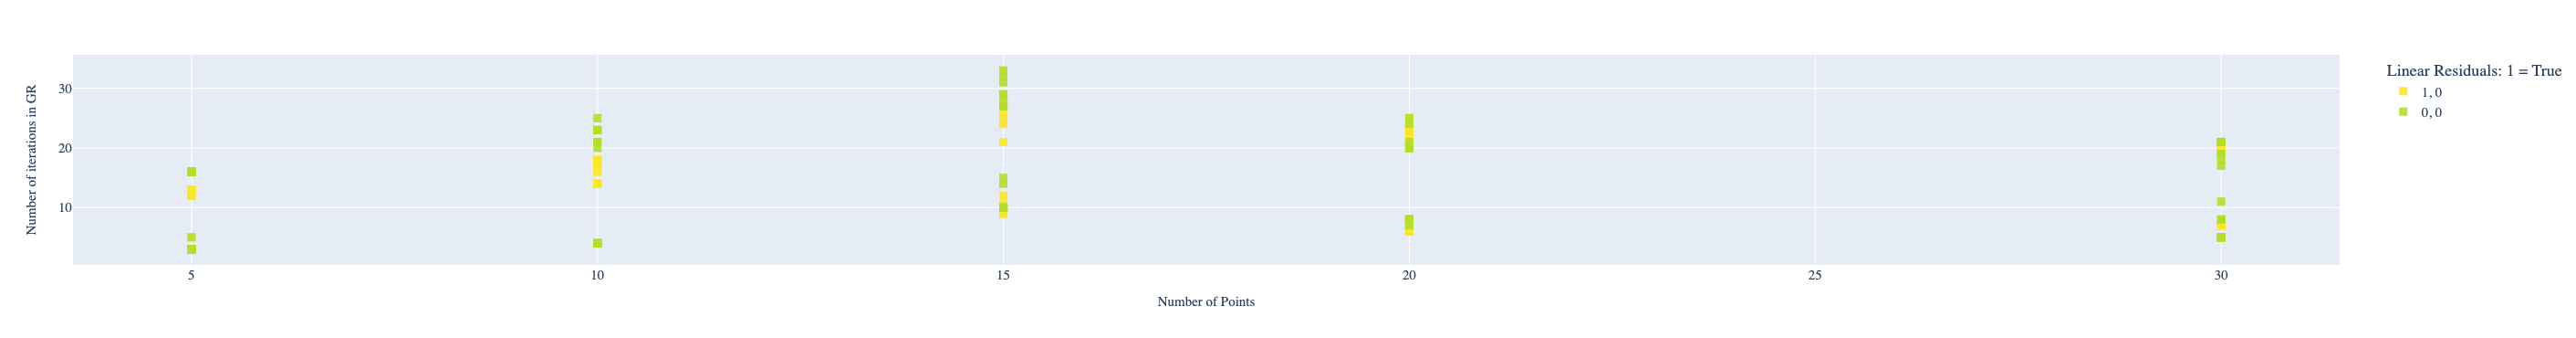

In [24]:
diff_scatter_grouped(
    df = df4,
    colored_by="linear_residuals_colors",
    marked_by="linear_noise_colors",
    y_label="n_geod_iterations",
    x_label = "n_X",
)

4b.hypersphere

## New viz function

In [32]:
df_space = df[df["dataset_name"] == dataset_name]
df_space = df_space.dropna(axis=1, how='all')
df_space["linear_residuals_colors"] = df_space["linear_residuals"]*1
df_space["linear_noise_colors"] = df_space["linear_noise"]*1

df5 = df_space[df_space["space_dimension"] == dim]
df5 = df5[df5["noise_factor"] == noise_factor]

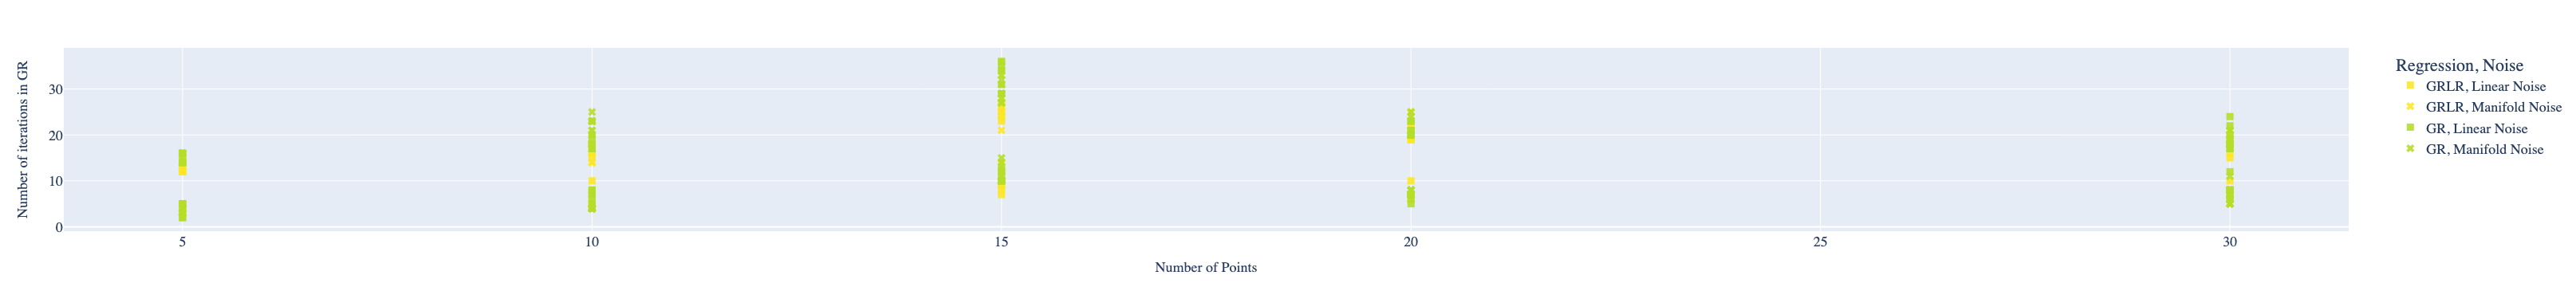

In [33]:
fig = viz.scatterplot_evaluation(
    df= df5,
    colored_by="linear_residuals",
    marked_by="linear_noise",
    x_label="n_X",
    y_label="n_geod_iterations",
)